In [3]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import dateutil.parser as parser

In [4]:
csv_filename = os.path.expanduser("~") + '/' + "file_SMM__test.csv"

tickets = []
with open(csv_filename, "r", newline='') as fd:
    reader = csv.DictReader(fd)
    tickets = [row for row in reader]

In [5]:
def clean_or_none(t):
    if t.get('Estimation', '') != '' and t.get('Done', '') != '' and t.get('In Progress', '') != '':
        estimation = int(t['Estimation'])
        days = (parser.isoparse(t['Done']) - parser.isoparse(t['In Progress'])).days

        if days < 45 and estimation < 13:
            return (estimation, days)

In [6]:
clean_tickets = []
for t in tickets:
    v = clean_or_none(t)
    if v is not None:    
        clean_tickets.append(v)


len(clean_tickets)

5

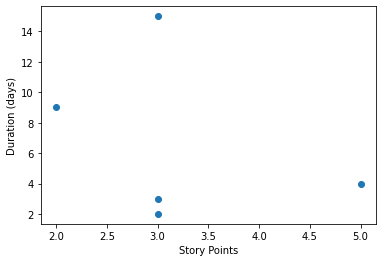

In [7]:
plt.scatter(*zip(*clean_tickets))
plt.xlabel("Story Points")
plt.ylabel("Duration (days)")
plt.show()

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.DataFrame(clean_tickets, columns =['Estimation', 'Days'])

In [10]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [11]:
df.groupby('Estimation').agg(['count', np.mean, np.median, percentile(75), percentile(90), np.std, np.min, np.max])

Days                                                              \
           count      mean median percentile_75 percentile_90       std amin   
Estimation                                                                     
2              1  9.000000      9             9           9.0       NaN    9   
3              3  6.666667      3             9          12.6  7.234178    2   
5              1  4.000000      4             4           4.0       NaN    4   

                 
           amax  
Estimation       
2             9  
3            15  
5             4